In [7]:
!rm -rf emotion_detected

!git clone https://github.com/Kiren855/emotion_detected.git

Cloning into 'emotion_detected'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 280 (delta 37), reused 51 (delta 18), pack-reused 207 (from 1)
Receiving objects: 100% (280/280), 17.38 MiB | 40.26 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [8]:
!python emotion_detected/src/train.py --root "/kaggle/input/fer2013/fer2013/fer2013.csv" --batch_size 64 --epochs 50 --output_model "emotion_model.keras"


Train batch shape:  380
Validation batch shape:  48
Epoch 1/50
I0000 00:00:1731987493.528617    1446 service.cc:145] XLA service 0x7c875400b0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731987493.528675    1446 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731987507.747056    1446 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
380/380 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.2045 - loss: 2.7698 - val_accuracy: 0.2906 - val_loss: 1.6631 - learning_rate: 1.0000e-04
Epoch 2/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.2337 - loss: 2.1062 - val_accuracy: 0.2909 - val_loss: 1.5958 - learning_rate: 1.0000e-04
Epoch 3/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2364 - loss: 1.9422 - val_accuracy: 0.2926 - val_loss: 1.6131 - learning_rate: 1.0000e-04
Epoch 4/50
380/380 ━━

In [3]:
!python emotion_detected/src/evaluate.py --model_path "/kaggle/working/result/emotion_model.keras" --root "/kaggle/input/fer2013/fer2013/fer2013.csv" --batch_size 64

Model loaded from /kaggle/working/result/emotion_model.keras
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731854783.512351    1034 service.cc:145] XLA service 0x789600003ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731854783.512419    1034 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731854784.715581    1034 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6830 - loss: 0.7842
Test Accuracy: 0.6881, Test Loss: 0.7794

In [4]:
import pandas as pd

history_df = pd.read_csv("/kaggle/working/result/training_history.csv")

history = {
    'accuracy': history_df['accuracy'].values,
    'val_accuracy': history_df['val_accuracy'].values,
    'loss': history_df['loss'].values,
    'val_loss': history_df['val_loss'].values
}

print("OK")

OK


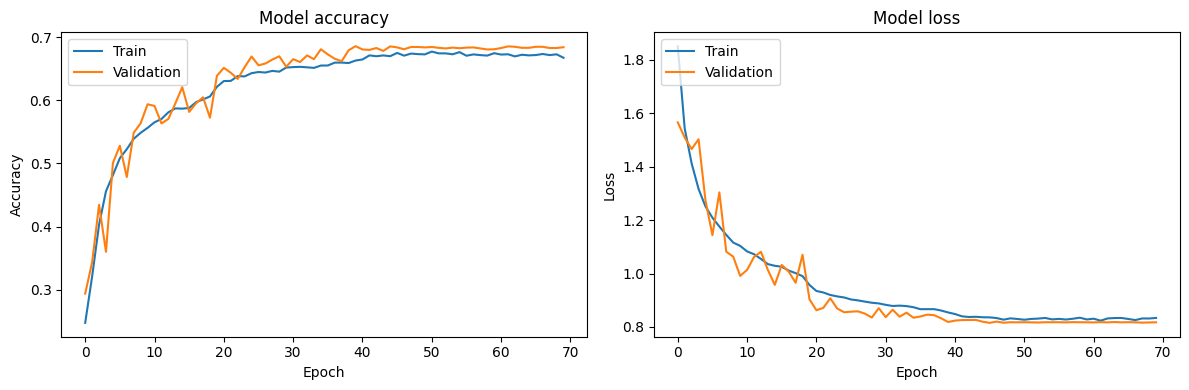

In [5]:
import matplotlib.pyplot as plt

def visualize_train_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

visualize_train_history(history)
